# MatPlotLib.

Наступне поле містить ініціалізацію даних, які необхідні для виконання завдань. Це поле необхідно виконати, але ніяких змін робити не треба.

In [45]:
import numpy as np
import pandas as pd
x = np.arange(-10, 11)
y = x**2
q = x**3

#### Імпортуйте бібліотеку 'matplotlib' та додайте поле '%matplotlib inline'.

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

#### Побудуйте графік, для даних x та y. Задайте назву осей та графіку.

Text(0.5, 1.0, 'Парабула')

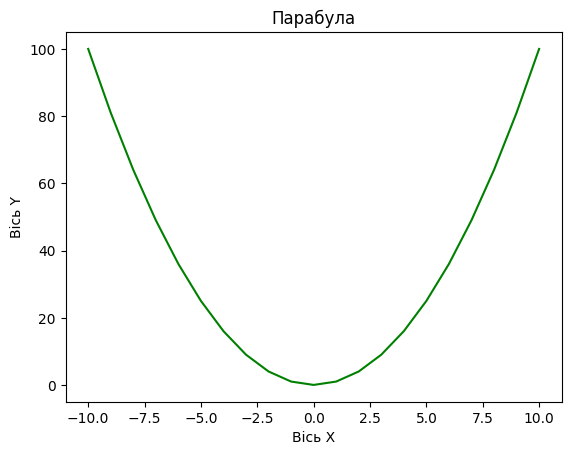

In [47]:
plt.plot(x, y, 'g')
plt.xlabel('Вісь Х')
plt.ylabel('Вісь Y')
plt.title('Парабула')

Text(0.5, 1.0, 'Парабола')

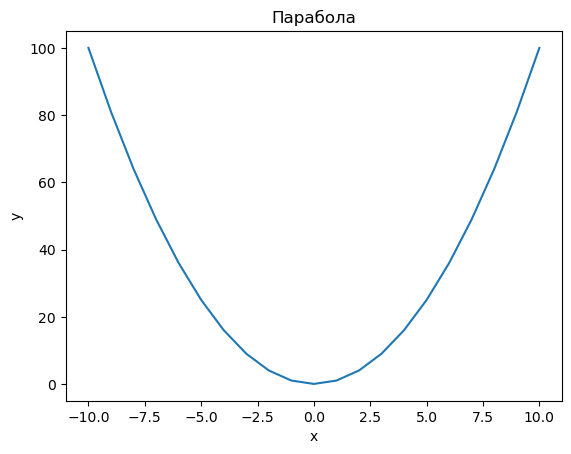

#### Побудуйте дві системи координат, одна з яких буде мати параметри розмірів/розташування [0, 0, 1, 1] а інший [0.4, 0.5, 0.2, 0.2].

(0.0, 1.0)

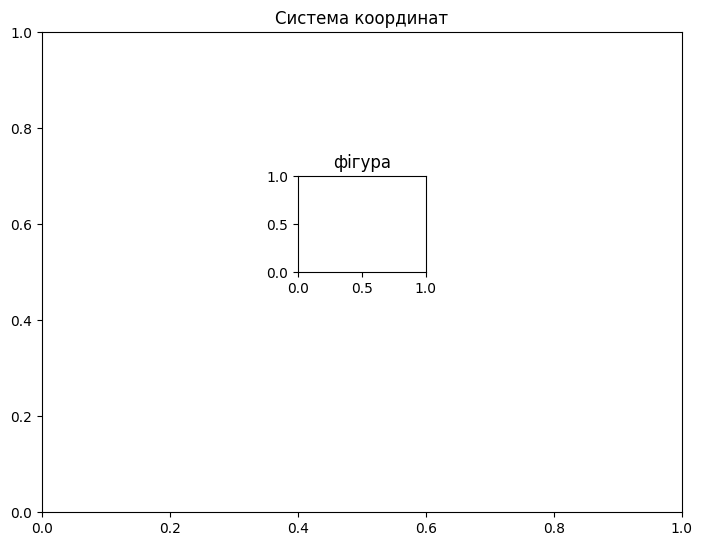

In [48]:
# Створюємо фігуру
fig = plt.figure()

# Перший підграфік з параметрами [0, 0, 1, 1]
ax1 = fig.add_axes([0, 0, 1, 1])
ax1.set_title('Система координат')
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)

# Другий підграфік з параметрами [0.4, 0.5, 0.2, 0.2]
ax2 = fig.add_axes([0.4, 0.5, 0.2, 0.2])
ax2.set_title('фігура')
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)

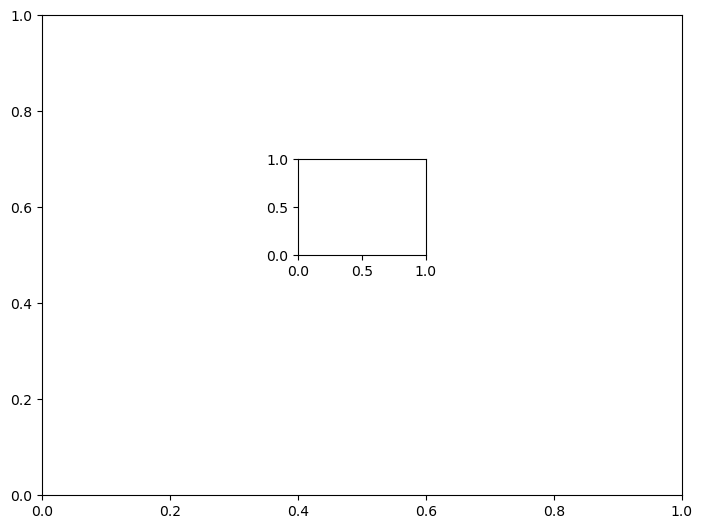

#### Додайте графіки до побудованих систем координат та покажіть їх на екрані. Перший графік для даних x i y, другий графік для даних x i q.

Text(0, 0.5, 'Q')

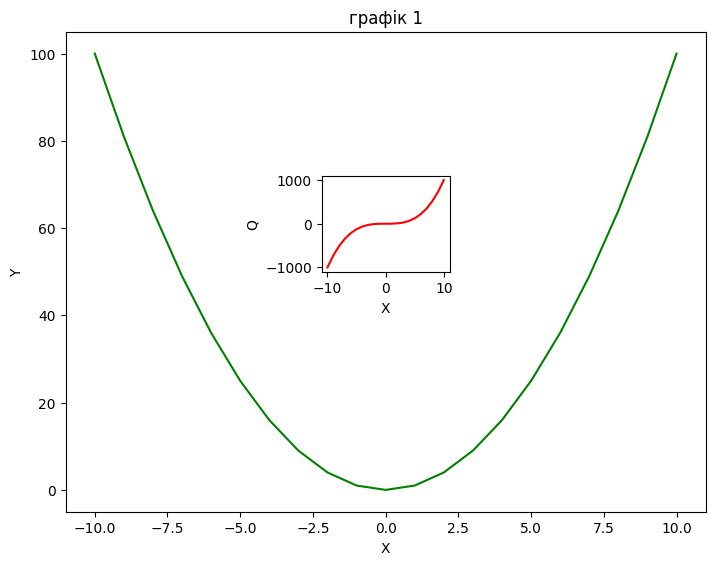

In [49]:
fig = plt.figure()
ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes([0.4, 0.5, 0.2, 0.2])
ax1.set_title('графік 1')
ax1.plot(x, y, 'g')
ax2.plot(x, q, 'r')
ax1.set_xlabel('Х')
ax1.set_ylabel('Y')
ax2.set_xlabel('X')
ax2.set_ylabel('Q')

Text(0, 0.5, 'q')

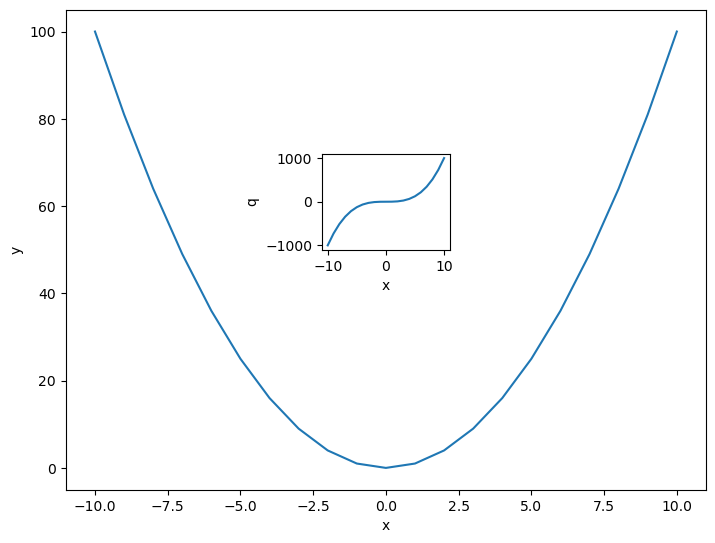

#### Створіть два підполотна. У них побудуйте графік (x,y) та графік (x,q). Використайте різні параметри для кольору, товщини та стилю ліній графіків.

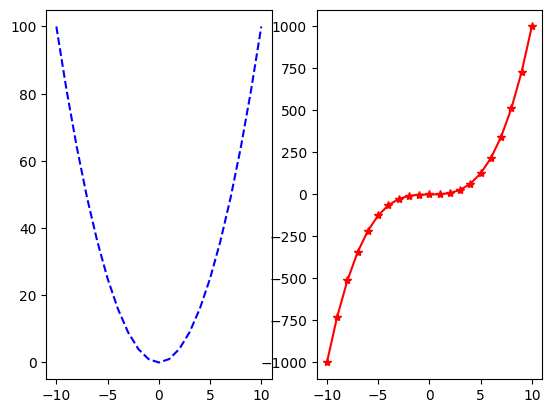

In [50]:
plt.subplot(1, 2, 1)
plt.plot(x, y, 'b--')
plt.subplot(1, 2, 2)
plt.plot(x, q, 'r*-');

Text(0, 0.5, 'q')

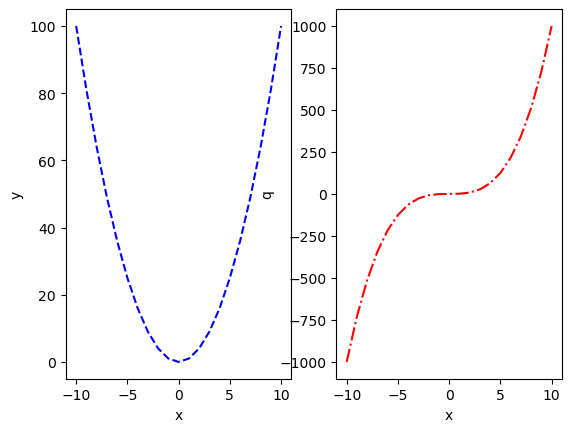

# Seaborn.

## Дані. 
Для роботи буде використаний датасет "Титанік".

In [51]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### Створіть графіки використовуючи дані з датафрейму "Титанік".

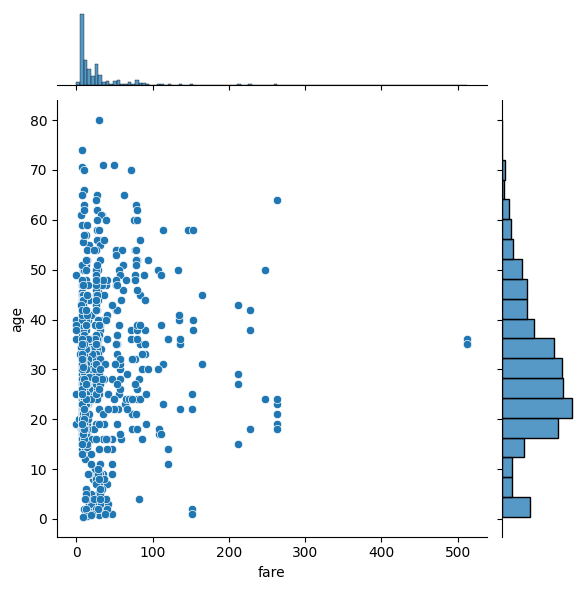

In [52]:
%matplotlib inline
sns.jointplot(x = 'fare', y = 'age', data = titanic, kind = 'scatter')

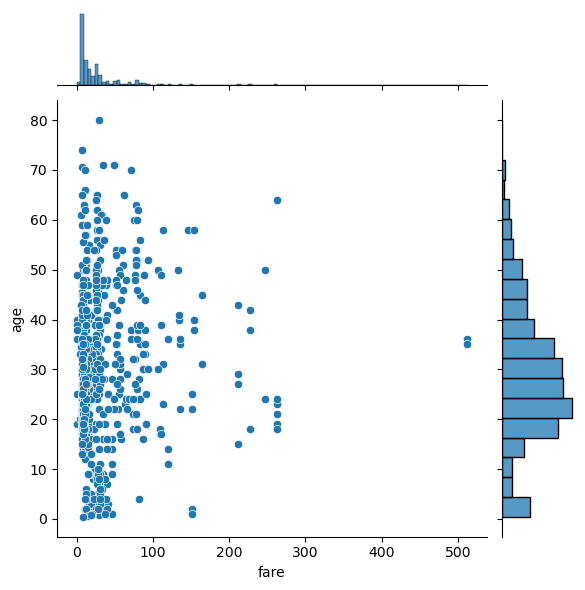

<Axes: xlabel='fare', ylabel='Count'>

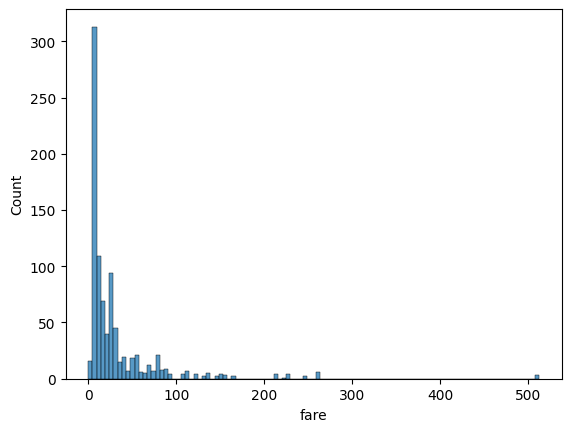

In [53]:
sns.histplot(titanic['fare'])

<Axes: xlabel='fare', ylabel='Count'>

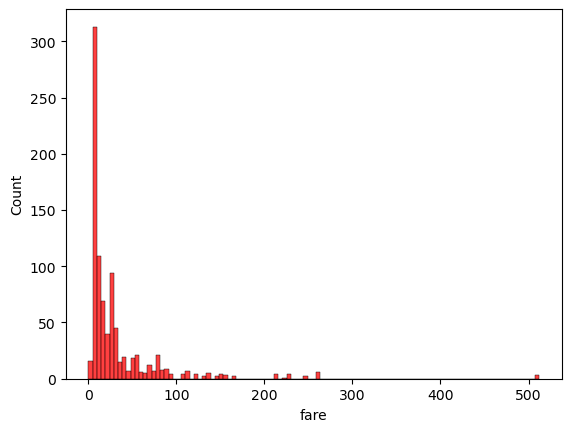

<Axes: xlabel='class', ylabel='age'>

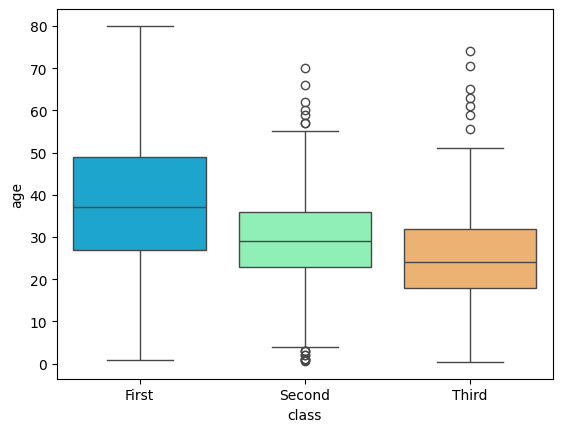

In [56]:
sns.boxplot(x = "class", y = "age", data = titanic, palette = 'rainbow', hue = 'class')

<Axes: xlabel='class', ylabel='age'>

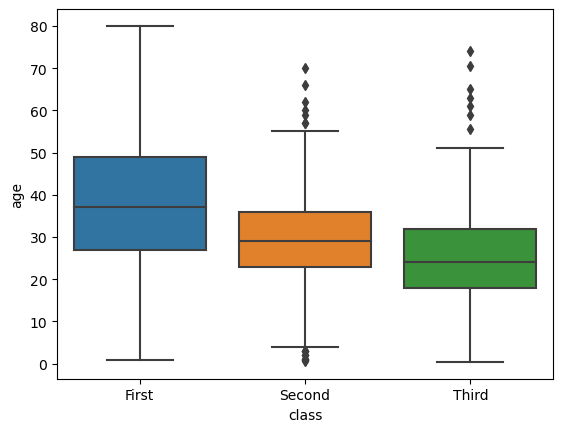

<Axes: xlabel='class', ylabel='age'>

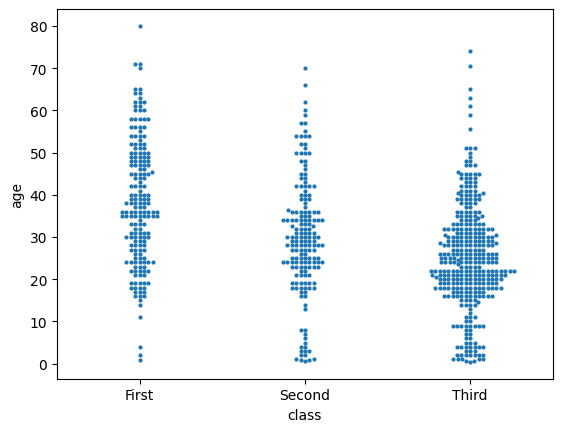

In [64]:
sns.swarmplot(x = "class", y = "age", data = titanic, size=3)

<Axes: xlabel='class', ylabel='age'>

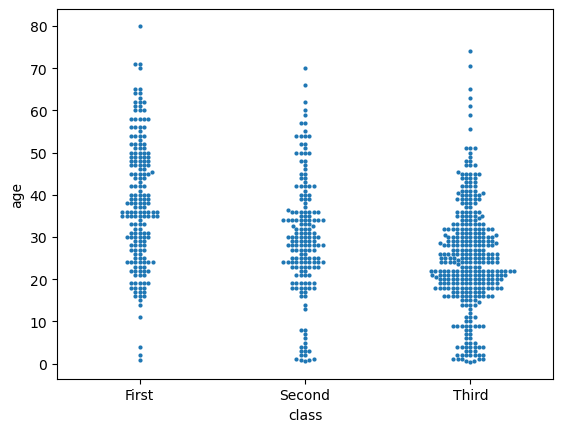

<Axes: xlabel='sex', ylabel='count'>

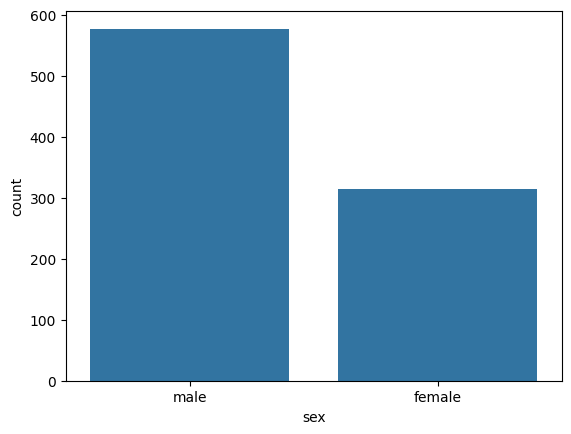

In [73]:
sns.countplot(x = 'sex', data = titanic)

<Axes: xlabel='sex', ylabel='count'>

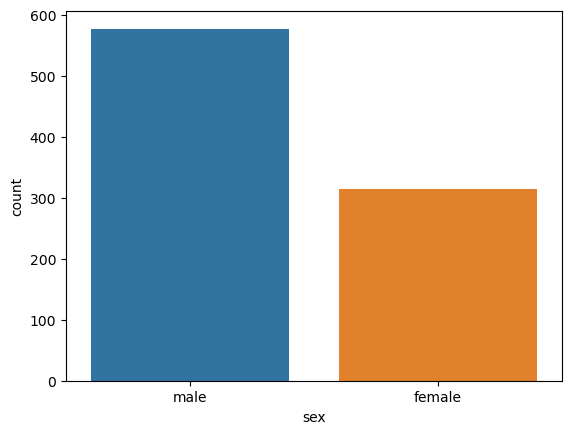

<Axes: >

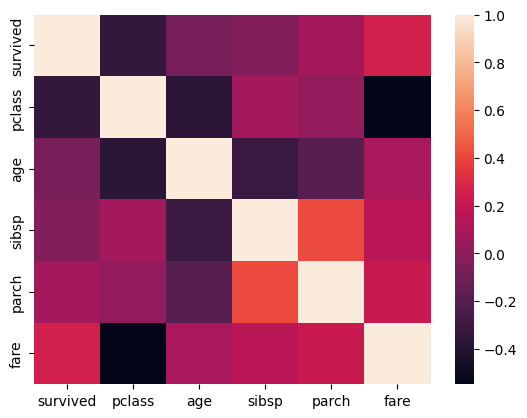

In [80]:
numeric_titanic = titanic.select_dtypes(include=['float', 'int'])
sns.heatmap(numeric_titanic.corr())
# sns.heatmap(titanic.corr())
# ValueError: could not convert string to float: 'male'

<Axes: >

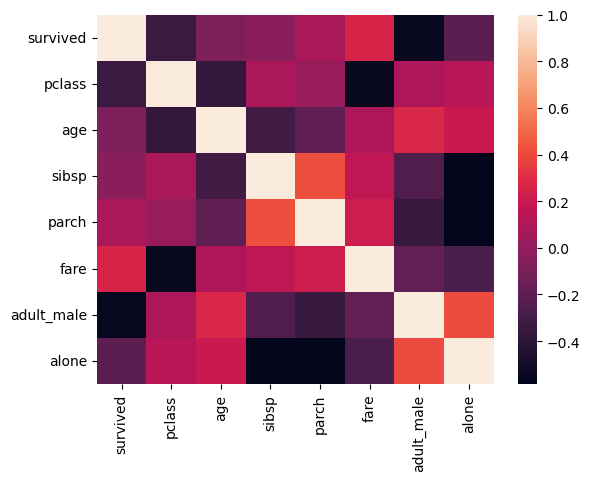

# Plotly.

Продовжуйте роботу з набором даних "Титанік".
Імпортуйте необхідні бібліотеки.

In [2]:
import plotly.express as px
import plotly.figure_factory as ff

ImportError: Plotly express requires pandas to be installed.

In [95]:
df = sns.load_dataset('titanic')
fig = px.histogram(df, x="class", title="Distribution of classes")
fig.show()

In [1]:
df = df.select_dtypes(include=['float64', 'int64'])
fig = ff.create_annotated_heatmap(
    z=df.corr().values,
    x=df.corr().columns.tolist(),
    y=df.corr().columns.tolist(),
    colorscale='Viridis'
)
fig.update_layout(title='Correlation Heatmap for Titanic Dataset')
fig.show()

NameError: name 'df' is not defined

Як вхідні дані для мапи тепла використайте дані про кореляцію даних у наборі даних "Титанік".

ValueError: Value of 'names' is not the name of a column in 'data_frame'. Expected one of ['count'] but received: age

In [128]:
df['survived_label'] = df['survived'].map({0: 'alive', 1: 'dead'})
fig = px.pie(
    df,
    names='survived_label',  # Назва категорії (0 - не вижив, 1 - вижив)
    values='fare',     # Значення для побудови (можете змінити на іншу колонку)
    title='Survival Rate on the Titanic',
    color='survived',  # Додаємо кольори на основі категорії виживання
    color_discrete_sequence=['green','red'], # Налаштовуємо кольори
)
fig.show()

In [134]:
# Створюємо 3D графік
df = sns.load_dataset('titanic')
fig = px.scatter_3d(
    df,
    x='age',            # Вік
    y='fare',           # Вартість проїзду
    z='class',         # Клас
    color='survived',   # Інформація про виживання
    color_continuous_scale=['red', 'green'],  # Кольори для виживання (0 - червоний, 1 - зелений)
    title='3D Scatter Plot of Age, Fare, and Class with Survival Information',
    labels={'age': 'Вік', 'fare': 'Вартість проїзду', 'pclass': 'Клас'},
)

# Додаємо етикетки осей
fig.update_layout(scene=dict(
                    xaxis_title='Вік',
                    yaxis_title='Вартість проїзду',
                    zaxis_title='Клас'))

fig.show()

Створіть 3D графік, де ви побудуєте залежність від віку, вартості проїзду та класу. Для кодування кольором використайте інформацію з набору даних про те, чи вижив пасажир.